In [28]:
def showrst(df):
    print(df.to_markdown(tablefmt="grid"))

In [29]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [30]:
import pandas as pd
import nannyml as nml

df_ref, df_ana, df_ana_gt = nml.datasets.load_synthetic_sample()

In [31]:
df_ref.head(3)

,distance_from_office,salary_range,gas_price_per_litre,public_transportation_cost,wfh_prev_workday,workday,tenure,identifier,work_home_actual,timestamp,y_pred_proba,partition
0,5.962247,40K - 60K €,2.119485,8.568058,False,Friday,0.212653,0,1,2014-05-09 22:27:20,0.99,reference
1,0.535872,40K - 60K €,2.357199,5.425382,True,Tuesday,4.927549,1,0,2014-05-09 22:59:32,0.07,reference
2,1.969519,40K - 60K €,2.366849,8.247158,False,Monday,0.520817,2,1,2014-05-09 23:48:25,1.00,reference


In [32]:
print(df_ref.head(3).to_markdown(tablefmt="grid"))

+----+------------------------+----------------+-----------------------+------------------------------+--------------------+-----------+----------+--------------+--------------------+---------------------+----------------+-------------+
|    |   distance_from_office | salary_range   |   gas_price_per_litre |   public_transportation_cost | wfh_prev_workday   | workday   |   tenure |   identifier |   work_home_actual | timestamp           |   y_pred_proba | partition   |
+====+========================+================+=======================+==============================+====================+===========+==========+==============+====================+=====================+================+=============+
|  0 |               5.96225  | 40K - 60K €    |               2.11948 |                      8.56806 | False              | Friday    | 0.212653 |            0 |                  1 | 2014-05-09 22:27:20 |           0.99 | reference   |
+----+------------------------+----------------+----

In [33]:
df_ana.head(3)

,distance_from_office,salary_range,gas_price_per_litre,public_transportation_cost,wfh_prev_workday,workday,tenure,identifier,timestamp,y_pred_proba,partition
0,0.527691,0 - 20K €,1.800003,8.960724,False,Tuesday,4.224628,50000,2017-08-31 04:20:00,0.99,analysis
1,8.485134,20K - 20K €,2.222074,8.768792,False,Friday,4.963103,50001,2017-08-31 05:16:16,0.98,analysis
2,2.073876,40K - 60K €,2.310077,8.649979,True,Friday,4.588951,50002,2017-08-31 05:56:44,0.98,analysis


In [34]:
print(df_ana.head(3).to_markdown(tablefmt="grid"))

+----+------------------------+----------------+-----------------------+------------------------------+--------------------+-----------+----------+--------------+---------------------+----------------+-------------+
|    |   distance_from_office | salary_range   |   gas_price_per_litre |   public_transportation_cost | wfh_prev_workday   | workday   |   tenure |   identifier | timestamp           |   y_pred_proba | partition   |
+====+========================+================+=======================+==============================+====================+===========+==========+==============+=====================+================+=============+
|  0 |               0.527691 | 0 - 20K €      |               1.8     |                      8.96072 | False              | Tuesday   |  4.22463 |        50000 | 2017-08-31 04:20:00 |           0.99 | analysis    |
+----+------------------------+----------------+-----------------------+------------------------------+--------------------+-----------+

In [35]:
md = nml.extract_metadata(df_ref)
md.ground_truth_column_name = 'work_home_actual'


In [36]:
cbpe = nml.CBPE(model_metadata=md, chunk_size=5000)
cbpe.fit(reference_data=df_ref)
est_perf = cbpe.estimate(pd.concat([df_ref, df_ana]))

In [37]:
est_perf

,key,start_index,end_index,start_date,end_date,partition,estimated_roc_auc,confidence,upper_threshold,lower_threshold,alert
0,[0:4999],0,4999,2014-05-09,2014-09-09 23:59:59,reference,0.969051,0.000358,0.97866,0.963317,False
1,[5000:9999],5000,9999,2014-09-09,2015-01-09 23:59:59,reference,0.968909,0.000358,0.97866,0.963317,False
2,[10000:14999],10000,14999,2015-01-09,2015-05-09 23:59:59,reference,0.968657,0.000358,0.97866,0.963317,False
3,[15000:19999],15000,19999,2015-05-09,2015-09-07 23:59:59,reference,0.968973,0.000358,0.97866,0.963317,False
4,[20000:24999],20000,24999,2015-09-07,2016-01-08 23:59:59,reference,0.968962,0.000358,0.97866,0.963317,False
5,[25000:29999],25000,29999,2016-01-08,2016-05-09 23:59:59,reference,0.969079,0.000358,0.97866,0.963317,False
6,[30000:34999],30000,34999,2016-05-09,2016-09-04 23:59:59,reference,0.968725,0.000358,0.97866,0.963317,False
7,[35000:39999],35000,39999,2016-09-04,2017-01-03 23:59:59,reference,0.968885,0.000358,0.97866,0.963317,False
8,[40000:44999],40000,44999,2017-01-03,2017-05-03 23:59:59,reference,0.969227,0.000358,0.97866,0.963317,False
9,[45000:49999],45000,49999,2017-05-03,2017-08-31 23:59:59,reference,0.969002,0.000358,0.97866,0.963317,False


In [38]:
est_perf.head(3)

,key,start_index,end_index,start_date,end_date,partition,estimated_roc_auc,confidence,upper_threshold,lower_threshold,alert
0,[0:4999],0,4999,2014-05-09,2014-09-09 23:59:59,reference,0.969051,0.000358,0.97866,0.963317,False
1,[5000:9999],5000,9999,2014-09-09,2015-01-09 23:59:59,reference,0.968909,0.000358,0.97866,0.963317,False
2,[10000:14999],10000,14999,2015-01-09,2015-05-09 23:59:59,reference,0.968657,0.000358,0.97866,0.963317,False


In [39]:
print(est_perf.head(3).to_markdown(tablefmt="grid"))

+----+---------------+---------------+-------------+---------------------+---------------------+-------------+---------------------+--------------+-------------------+-------------------+---------+
|    | key           |   start_index |   end_index | start_date          | end_date            | partition   |   estimated_roc_auc |   confidence |   upper_threshold |   lower_threshold | alert   |
+====+===============+===============+=============+=====================+=====================+=============+=====================+==============+===================+===================+=========+
|  0 | [0:4999]      |             0 |        4999 | 2014-05-09 00:00:00 | 2014-09-09 23:59:59 | reference   |            0.969051 |   0.00035752 |           0.97866 |          0.963317 | False   |
+----+---------------+---------------+-------------+---------------------+---------------------+-------------+---------------------+--------------+-------------------+-------------------+---------+
|  1 | [50

In [40]:
import numpy as np
np.std(est_perf[est_perf['partition']=='reference']['estimated_roc_auc'])*2

0.00031572764741503474

In [41]:
plots = nml.PerformancePlots(model_metadata=md, chunker=cbpe.chunker)
fig = plots.plot_cbpe_performance_estimation(est_perf).show()

In [42]:
est_perf

,key,start_index,end_index,start_date,end_date,partition,estimated_roc_auc,confidence,upper_threshold,lower_threshold,alert,thresholds,estimated
0,[0:4999],0,4999,2014-05-09,2014-09-09 23:59:59,reference,0.969051,0.000358,0.97866,0.963317,False,"(0.963316535948479, 0.9786597341713761)",True
1,[5000:9999],5000,9999,2014-09-09,2015-01-09 23:59:59,reference,0.968909,0.000358,0.97866,0.963317,False,"(0.963316535948479, 0.9786597341713761)",True
2,[10000:14999],10000,14999,2015-01-09,2015-05-09 23:59:59,reference,0.968657,0.000358,0.97866,0.963317,False,"(0.963316535948479, 0.9786597341713761)",True
3,[15000:19999],15000,19999,2015-05-09,2015-09-07 23:59:59,reference,0.968973,0.000358,0.97866,0.963317,False,"(0.963316535948479, 0.9786597341713761)",True
4,[20000:24999],20000,24999,2015-09-07,2016-01-08 23:59:59,reference,0.968962,0.000358,0.97866,0.963317,False,"(0.963316535948479, 0.9786597341713761)",True
5,[25000:29999],25000,29999,2016-01-08,2016-05-09 23:59:59,reference,0.969079,0.000358,0.97866,0.963317,False,"(0.963316535948479, 0.9786597341713761)",True
6,[30000:34999],30000,34999,2016-05-09,2016-09-04 23:59:59,reference,0.968725,0.000358,0.97866,0.963317,False,"(0.963316535948479, 0.9786597341713761)",True
7,[35000:39999],35000,39999,2016-09-04,2017-01-03 23:59:59,reference,0.968885,0.000358,0.97866,0.963317,False,"(0.963316535948479, 0.9786597341713761)",True
8,[40000:44999],40000,44999,2017-01-03,2017-05-03 23:59:59,reference,0.969227,0.000358,0.97866,0.963317,False,"(0.963316535948479, 0.9786597341713761)",True
9,[45000:49999],45000,49999,2017-05-03,2017-08-31 23:59:59,reference,0.969002,0.000358,0.97866,0.963317,False,"(0.963316535948479, 0.9786597341713761)",True


In [43]:
showrst(df_ana_gt)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

df_ana_full = pd.merge(df_ana,df_ana_gt, on = 'identifier')
df_all = pd.concat([df_ref, df_ana_full]).reset_index(drop=True)

target_col = 'work_home_actual'
pred_score_col = 'y_pred_proba'
actual_performance = []

for idx in est_perf.index:
    start_index, end_index = est_perf.loc[idx, 'start_index'], est_perf.loc[idx, 'end_index']
    sub = df_all.loc[start_index:end_index]
    actual_perf = roc_auc_score(sub[target_col], sub[pred_score_col])
    est_perf.loc[idx, 'actual_roc_auc'] = actual_perf


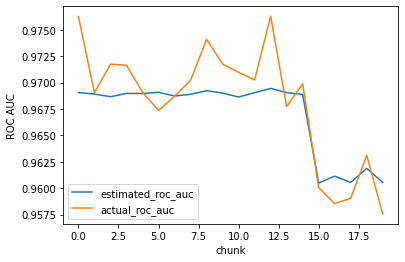

In [19]:
est_perf[['estimated_roc_auc', 'actual_roc_auc']].plot()
plt.xlabel('chunk')
plt.ylabel('ROC AUC')
plt.savefig('guide-performance_estimation_tmp.svg')